In [ ]:
!pip install metaknowledge
!pip install gensim
!pip install nltk
!pip install spacy
!pip install pyLDAvis

In [ ]:
import pandas as pd
import numpy as np
import metaknowledge as mk
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import spacy
import gensim
from gensim import models
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import ldamodel
from gensim.models import CoherenceModel
import re
import pyLDAvis
import pyLDAvis.gensim_models
import collections
collections.Iterable = collections.abc.Iterable
collections.Mapping = collections.abc.Mapping
collections.MutableSet = collections.abc.MutableSet
collections.MutableMapping = collections.abc.MutableMapping
collections.Sized = collections.abc.Sized
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from pprint import pprint
import matplotlib.pyplot as plt
import wordcloud

In [ ]:
# Import previously formatted Web of Science record
RC = mk.RecordCollection("formated-wos.txt")

data = RC.forNLP("topic_model.csv", lower=True, removeNumbers=True, removeNonWords=True, removeWhitespace=True)

docs = data['abstract']
docs

['this study aimed to identify the influence of workplace cyber ostracism on employee online work engagement and employee mental wellbeing with the mediating roles of remote work challenges such as loneliness procrastination workhome interference and ineffective communication as amidst lockdown due to covid the data was collected from  respondents through an online questionnaire that was distributed in virtual groups among friends relatives and other fellows who were working in the private sector organizations of pakistan the hypotheses were tested using the partial least square structural equation modeling plssem technique the findings of this study showed that workplace cyber ostracism has a positive and significant impact on employee online work engagement and employee mental wellbeing moreover results also demonstrated that loneliness ineffective communication procrastination and workhome interference positively and significantly mediate the relationship between workplace cyber ost

In [ ]:
# Cleaning and preprocessing text
def clean(docs):
    def sent_to_words(sentences):
        for sentence in sentences:
            yield (simple_preprocess(str(sentence), deacc = True))
    tokens = sent_to_words(docs)
    stop = set(stopwords.words("english"))
    lmtzr = WordNetLemmatizer()
    tokens_stopped = [[word for word in post if word not in stop] for post in tokens]
    tokens_cleaned = [[lmtzr.lemmatize(word) for word in post] for post in tokens_stopped]
    return tokens_cleaned

cleaned_docs = clean(docs)
cleaned_docs

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['study',
  'aimed',
  'identify',
  'influence',
  'workplace',
  'cyber',
  'ostracism',
  'employee',
  'online',
  'work',
  'engagement',
  'employee',
  'mental',
  'wellbeing',
  'mediating',
  'role',
  'remote',
  'work',
  'challenge',
  'loneliness',
  'procrastination',
  'workhome',
  'interference',
  'ineffective',
  'communication',
  'amidst',
  'lockdown',
  'due',
  'covid',
  'data',
  'collected',
  'respondent',
  'online',
  'questionnaire',
  'distributed',
  'virtual',
  'group',
  'among',
  'friend',
  'relative',
  'fellow',
  'working',
  'private',
  'sector',
  'organization',
  'pakistan',
  'hypothesis',
  'tested',
  'using',
  'partial',
  'least',
  'square',
  'structural',
  'equation',
  'modeling',
  'plssem',
  'technique',
  'finding',
  'study',
  'showed',
  'workplace',
  'cyber',
  'ostracism',
  'positive',
  'significant',
  'impact',
  'employee',
  'online',
  'work',
  'engagement',
  'employee',
  'mental',
  'wellbeing',
  'moreover

In [ ]:
# Creating a dictionary
id2word = corpora.Dictionary(cleaned_docs)
print(id2word)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Dictionary<8140 unique tokens: ['aimed', 'also', 'amidst', 'among', 'article']...>


In [ ]:
# Filtering infrequent and over frequent words
id2word.filter_extremes(no_below=5, no_above=0.5)

# Creating a document-term matrix
corpus = [id2word.doc2bow(doc) for doc in cleaned_docs]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# LDA model with 2 topics
model = ldamodel.LdaModel(corpus = corpus, num_topics = 2, id2word = id2word,
                              passes = 10, update_every = 1, chunksize = 1000, per_word_topics = True, random_state = 1)
pprint(model.print_topics())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.025*"online" + 0.011*"study" + 0.007*"learning" + 0.007*"result" + '
  '0.007*"research" + 0.007*"student" + 0.006*"freelancer" + 0.006*"pandemic" '
  '+ 0.005*"group" + 0.005*"model"'),
 (1,
  '0.036*"platform" + 0.025*"worker" + 0.011*"labour" + 0.010*"digital" + '
  '0.009*"article" + 0.009*"social" + 0.008*"employment" + 0.008*"economy" + '
  '0.007*"study" + 0.006*"new"')]


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model, corpus, id2word, mds = "tsne")
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
1      13.141898 -30.803396       1        1  53.852414
0     -13.141593  30.803640       2        1  46.147586, topic_info=         Term        Freq       Total Category  logprob  loglift
201  platform  992.000000  992.000000  Default  30.0000  30.0000
32     online  647.000000  647.000000  Default  29.0000  29.0000
211    worker  726.000000  726.000000  Default  28.0000  28.0000
97     labour  303.000000  303.000000  Default  27.0000  27.0000
695  learning  167.000000  167.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
102       new   95.332725  265.847540   Topic2  -5.4740  -0.2522
417     paper   84.759779  204.140009   Topic2  -5.5916  -0.1057
16    finding   74.812673  141.464178   Topic2  -5.7164   0.1363
58    working   77.553593  214.793265   Topic2  -5.6804  -0.2454
1        also   76.338628  203.219080   Topic2  -5.6962  -0.2058

[168 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
507       1  0.291625     activity
507       2  0.709622     activity
338       1  0.983201  algorithmic
338       2  0.013287  algorithmic
1         1  0.624941         also
...     ...       ...          ...
57        2  0.889705    wellbeing
211       1  0.926494       worker
211       2  0.072963       worker
58        1  0.637823      working
58        2  0.363140      working

[258 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


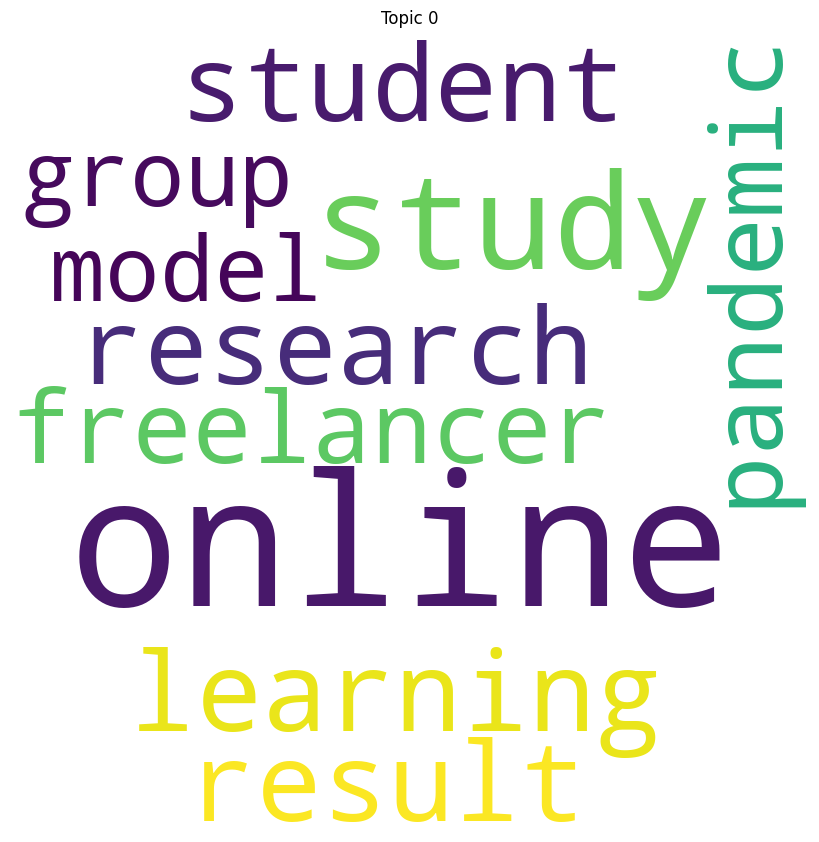

/usr/local/lib/python3.10/dist-packages/wordcloud/wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


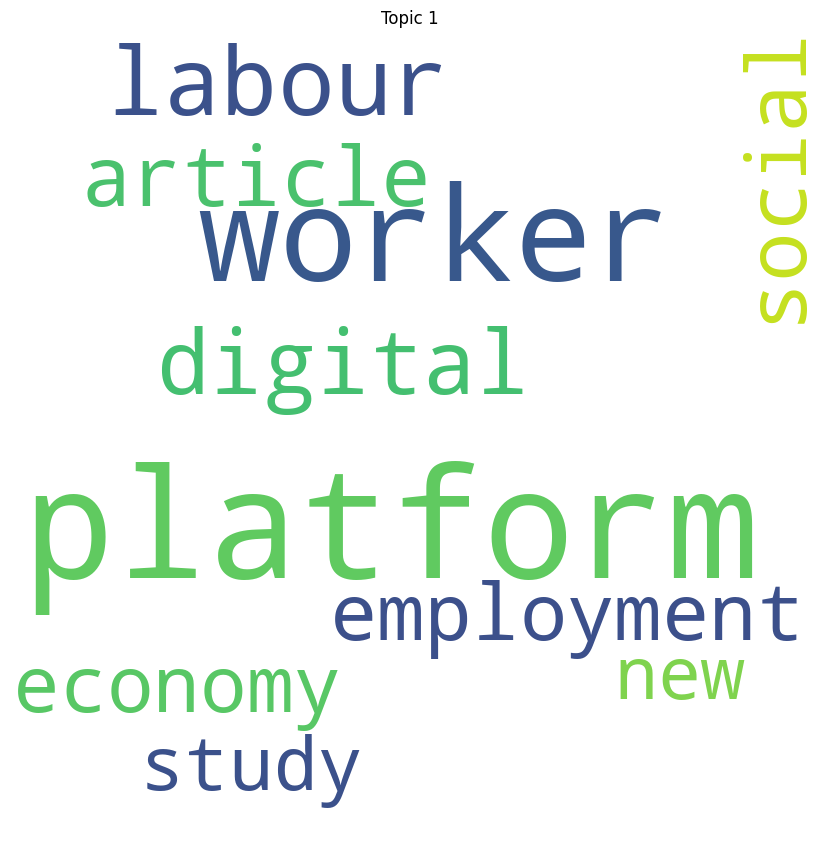

In [ ]:
# Word cloud for each topic
for i in range(2):
   wordcloud_obj = wordcloud.WordCloud(width = 800, height = 800,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10)

   topic = model.show_topic(i)
   topic_dict = {word: weight for word, weight in topic}

   wordcloud_obj.generate_from_frequencies(topic_dict)

   plt.figure(figsize = (8, 8), facecolor = None)
   plt.imshow(wordcloud_obj)
   plt.axis("off")
   plt.tight_layout(pad = 0)
   plt.title('Topic ' + str(i))

   plt.show()
